In [ ]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:

file_path = 'training.csv'
df = pd.read_csv(file_path)
print(df.head())


                                                text  label
0                            i didnt feel humiliated      0
1  i can go from feeling so hopeless to so damned...      0
2   im grabbing a minute to post i feel greedy wrong      3
3  i am ever feeling nostalgic about the fireplac...      2
4                               i am feeling grouchy      3


Joy: 5362
Sadness: 4666
Anger: 2159
Fear: 1937
Love: 1304
Surprise: 572


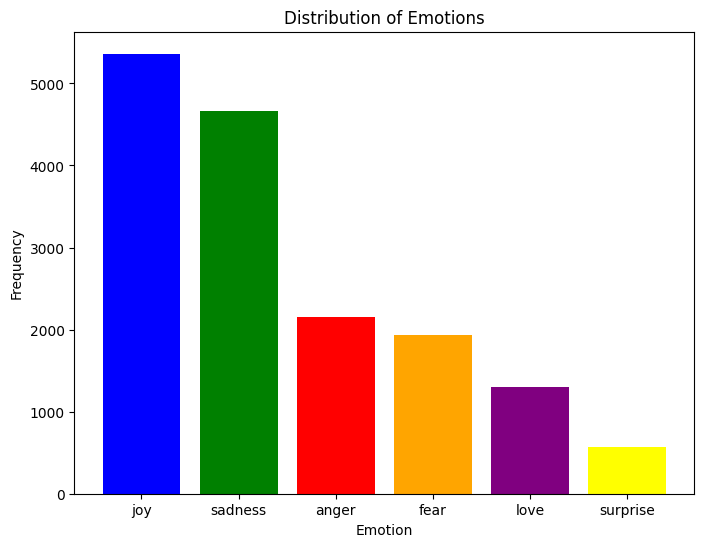

In [ ]:

df = pd.read_csv('training.csv')

label_map = {
    0: "sadness",
    1: "joy",
    2: "love",
    3: "anger",
    4: "fear",
    5: "surprise"
}


df['emotion'] = df['label'].map(label_map)
emotion_counts = df['emotion'].value_counts()

# Display the counts
for emotion, count in emotion_counts.items():
    print(f"{emotion.capitalize()}: {count}")

emotions = emotion_counts.index.tolist()
values = emotion_counts.values.tolist()

plt.figure(figsize=(8, 6))
plt.bar(emotions, values, color=['blue', 'green', 'red', 'orange', 'purple', 'yellow'])
plt.xlabel('Emotion')
plt.ylabel('Frequency')
plt.title('Distribution of Emotions')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping



In [ ]:

file_path = 'training.csv'
df = pd.read_csv(file_path)

df = df[['text', 'label']]

# Tokenize text data
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df['text'])
X = tokenizer.texts_to_sequences(df['text'])
X = pad_sequences(X, maxlen=100)

y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential([
    Embedding(input_dim=10000, output_dim=100, input_length=100),
    LSTM(64),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=64, callbacks=[early_stopping])

loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


Epoch 1/20
160/160 [==============================] - 24s 135ms/step - loss: -26.5436 - accuracy: 0.3415 - val_loss: -67.6954 - val_accuracy: 0.3270
Epoch 2/20
160/160 [==============================] - 19s 120ms/step - loss: -119.6084 - accuracy: 0.3422 - val_loss: -201.1522 - val_accuracy: 0.3270
Epoch 3/20
160/160 [==============================] - 20s 125ms/step - loss: -281.5910 - accuracy: 0.3422 - val_loss: -407.8900 - val_accuracy: 0.3270
Epoch 4/20
160/160 [==============================] - 20s 128ms/step - loss: -511.8813 - accuracy: 0.3422 - val_loss: -687.0214 - val_accuracy: 0.3270
Epoch 5/20
160/160 [==============================] - 19s 119ms/step - loss: -830.1268 - accuracy: 0.3422 - val_loss: -1032.3918 - val_accuracy: 0.3270
Epoch 6/20
160/160 [==============================] - 20s 126ms/step - loss: -1461.0792 - accuracy: 0.3736 - val_loss: -1656.5485 - val_accuracy: 0.3566
Epoch 7/20
160/160 [==============================] - 19s 119ms/step - loss: -2321.3279 - acc

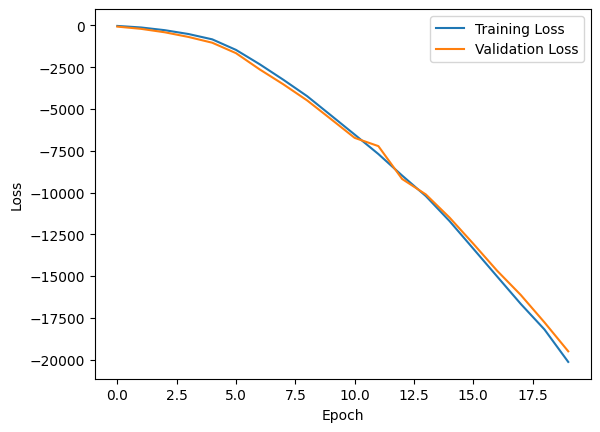

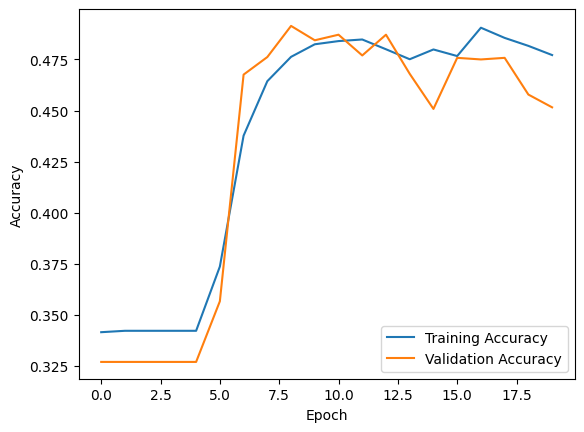

100/100 [==============================] - 5s 36ms/step
Actual Label: 0 Predicted Label: 0 Predicted Probability: 8.013369e-09
Actual Label: 1 Predicted Label: 1 Predicted Probability: 1.0
Actual Label: 0 Predicted Label: 0 Predicted Probability: 0.42968196
Actual Label: 1 Predicted Label: 1 Predicted Probability: 1.0
Actual Label: 0 Predicted Label: 1 Predicted Probability: 1.0
Actual Label: 0 Predicted Label: 0 Predicted Probability: 0.19891301
Actual Label: 4 Predicted Label: 1 Predicted Probability: 1.0
Actual Label: 0 Predicted Label: 1 Predicted Probability: 0.8392111
Actual Label: 2 Predicted Label: 1 Predicted Probability: 1.0
Actual Label: 4 Predicted Label: 1 Predicted Probability: 1.0


In [ ]:
import matplotlib.pyplot as plt

# Visualize training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Make predictions on the test set
predictions = model.predict(X_test)
predicted_labels = (predictions > 0.5).astype(int)

# Print some sample predictions
for i in range(10):
    print("Actual Label:", y_test.iloc[i], "Predicted Label:", predicted_labels[i][0], "Predicted Probability:", predictions[i][0])


In [ ]:
# Define the model architecture
model = Sequential([
    Embedding(input_dim=10000, output_dim=100, input_length=100),
    LSTM(64),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:

emotion_labels = ['joy', 'sadness', 'anger', 'fear', 'love', 'surprise']

for i, label in enumerate(y_test):

    emotion_index = label
    emotion = emotion_labels[emotion_index]
    print(f"Sample {i + 1} - Emotion: {emotion}, Intensity Prediction: {predictions[i][emotion_index]}")


Sample 1 - Emotion: joy, Intensity Prediction: 0.5043044686317444
Sample 2 - Emotion: sadness, Intensity Prediction: 0.4984952509403229
Sample 3 - Emotion: joy, Intensity Prediction: 0.49894630908966064
Sample 4 - Emotion: sadness, Intensity Prediction: 0.4983007311820984
Sample 5 - Emotion: joy, Intensity Prediction: 0.5013655424118042
Sample 6 - Emotion: joy, Intensity Prediction: 0.49837997555732727
Sample 7 - Emotion: love, Intensity Prediction: 0.5016492605209351
Sample 8 - Emotion: joy, Intensity Prediction: 0.5016940832138062
Sample 9 - Emotion: anger, Intensity Prediction: 0.4994533956050873
Sample 10 - Emotion: love, Intensity Prediction: 0.4997105300426483
Sample 11 - Emotion: joy, Intensity Prediction: 0.5007681250572205
Sample 12 - Emotion: fear, Intensity Prediction: 0.5019517540931702
Sample 13 - Emotion: sadness, Intensity Prediction: 0.4981066584587097
Sample 14 - Emotion: joy, Intensity Prediction: 0.5051401257514954
Sample 15 - Emotion: joy, Intensity Prediction: 0.50

<ipython-input-81-5437873c32a6>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(emotion_intensity_predictions, shade=True, label=emotion_label)


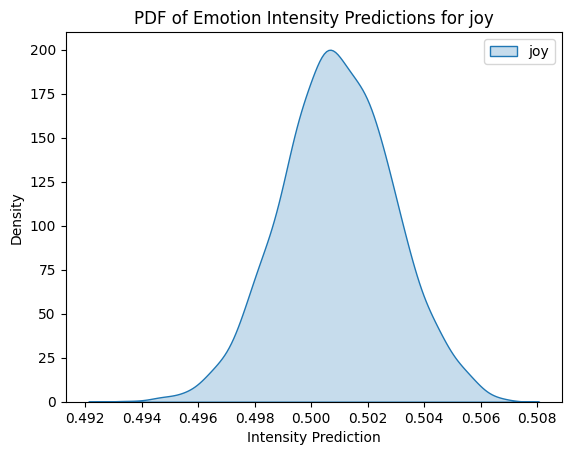

In [ ]:
import seaborn as sns

emotion_label = 'joy'

emotion_index = emotion_labels.index(emotion_label)

emotion_intensity_predictions = predictions[:, emotion_index]

sns.kdeplot(emotion_intensity_predictions, shade=True, label=emotion_label)

plt.xlabel('Intensity Prediction')
plt.ylabel('Density')
plt.title(f'PDF of Emotion Intensity Predictions for {emotion_label}')
plt.legend()

plt.show()


<ipython-input-82-f27b2fce2e08>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(emotion_intensity_predictions, shade=True, label=emotion_label)


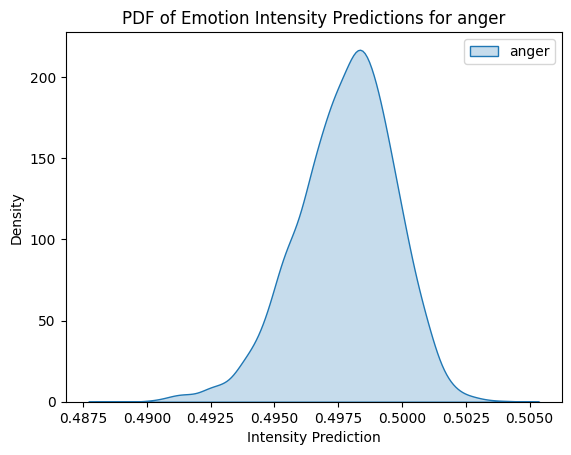

In [ ]:
import seaborn as sns

emotion_label = 'anger'

emotion_index = emotion_labels.index(emotion_label)

emotion_intensity_predictions = predictions[:, emotion_index]

sns.kdeplot(emotion_intensity_predictions, shade=True, label=emotion_label)

plt.xlabel('Intensity Prediction')
plt.ylabel('Density')
plt.title(f'PDF of Emotion Intensity Predictions for {emotion_label}')
plt.legend()

plt.show()


<ipython-input-83-c61f8f236aa6>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(emotion_intensity_predictions, shade=True, label=emotion_label)


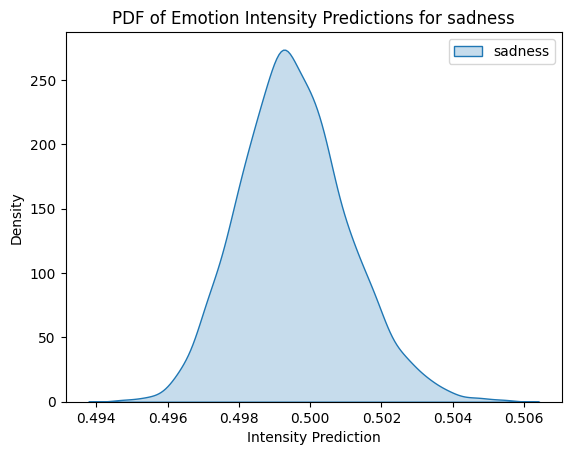

In [ ]:
import seaborn as sns

emotion_label = 'sadness'

emotion_index = emotion_labels.index(emotion_label)

emotion_intensity_predictions = predictions[:, emotion_index]

sns.kdeplot(emotion_intensity_predictions, shade=True, label=emotion_label)

plt.xlabel('Intensity Prediction')
plt.ylabel('Density')
plt.title(f'PDF of Emotion Intensity Predictions for {emotion_label}')
plt.legend()

plt.show()


<ipython-input-84-2d0f65b25c48>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(emotion_intensity_predictions, shade=True, label=emotion_label)


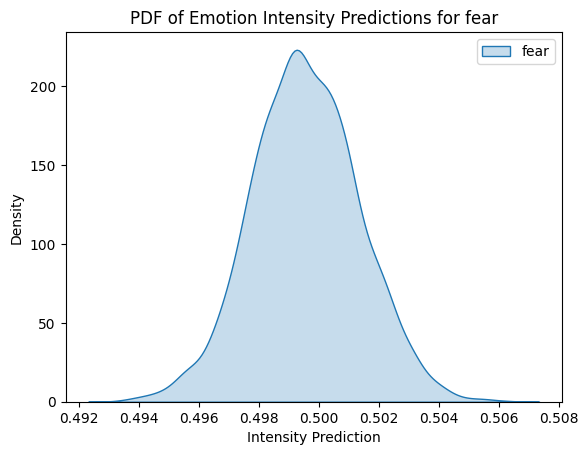

In [ ]:
import seaborn as sns

emotion_label = 'fear'

emotion_index = emotion_labels.index(emotion_label)

emotion_intensity_predictions = predictions[:, emotion_index]

sns.kdeplot(emotion_intensity_predictions, shade=True, label=emotion_label)

plt.xlabel('Intensity Prediction')
plt.ylabel('Density')
plt.title(f'PDF of Emotion Intensity Predictions for {emotion_label}')
plt.legend()

plt.show()


<ipython-input-85-3b6b8654a71c>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(emotion_intensity_predictions, shade=True, label=emotion_label)


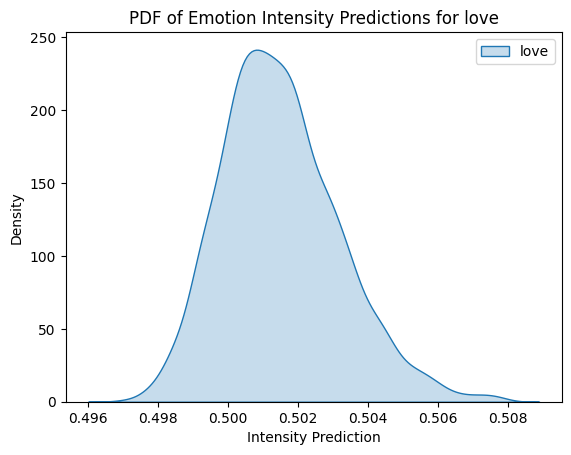

In [ ]:
import seaborn as sns

emotion_label = 'love'

emotion_index = emotion_labels.index(emotion_label)

emotion_intensity_predictions = predictions[:, emotion_index]

sns.kdeplot(emotion_intensity_predictions, shade=True, label=emotion_label)

plt.xlabel('Intensity Prediction')
plt.ylabel('Density')
plt.title(f'PDF of Emotion Intensity Predictions for {emotion_label}')
plt.legend()

plt.show()


<ipython-input-86-6f55a8cea9e8>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(emotion_intensity_predictions, shade=True, label=emotion_label)


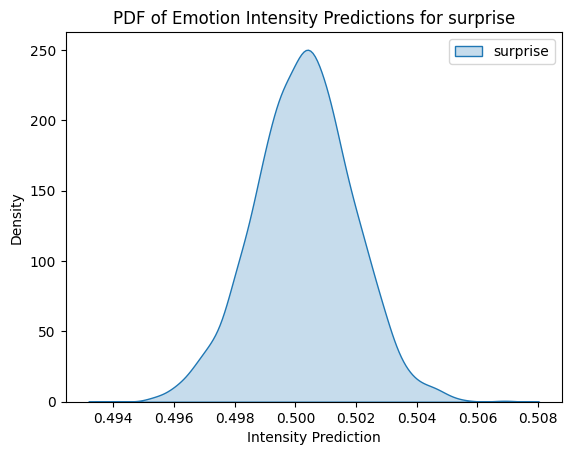

In [ ]:
import seaborn as sns

emotion_label = 'surprise'

emotion_index = emotion_labels.index(emotion_label)

emotion_intensity_predictions = predictions[:, emotion_index]

sns.kdeplot(emotion_intensity_predictions, shade=True, label=emotion_label)

plt.xlabel('Intensity Prediction')
plt.ylabel('Density')
plt.title(f'PDF of Emotion Intensity Predictions for {emotion_label}')
plt.legend()

plt.show()
